In [1]:
pip install mglearn

In [2]:
import mglearn

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.linear_model import Ridge
import pandas as pd

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [0]:
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False
%matplotlib inline

In [4]:
boston = load_boston()
print(type(boston.target), type(boston.data))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [5]:
print(boston.target.shape, boston.data.shape)

(506,) (506, 13)


In [6]:
df_boston = pd.DataFrame(boston.data, columns = boston.feature_names)
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
list(df_boston)

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT']

In [0]:
# df_boston.loc[행 ,열 ]

In [9]:
df_boston.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [10]:
df_boston.loc[:, 'CRIM':'RM']

,CRIM,ZN,INDUS,CHAS,NOX,RM
0,0.00632,18.0,2.31,0.0,0.538,6.575
1,0.02731,0.0,7.07,0.0,0.469,6.421
2,0.02729,0.0,7.07,0.0,0.469,7.185
3,0.03237,0.0,2.18,0.0,0.458,6.998
4,0.06905,0.0,2.18,0.0,0.458,7.147
5,0.02985,0.0,2.18,0.0,0.458,6.430
6,0.08829,12.5,7.87,0.0,0.524,6.012
7,0.14455,12.5,7.87,0.0,0.524,6.172
8,0.21124,12.5,7.87,0.0,0.524,5.631
9,0.17004,12.5,7.87,0.0,0.524,6.004


In [0]:
X = df_boston.loc[:, 'CRIM':'LSTAT']
y = boston.target

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 100)

In [0]:
#array로 바꾸어 주고 싶을 때는 아래와 같이 - 
# X_train = X_train.values
# y_train = y_train.values
# X_test = X_test.values
# y_test = y_test.values

In [0]:
from sklearn.linear_model import LinearRegression

In [0]:
model = LinearRegression().fit(X_train, y_train)

In [19]:
print('훈련 데이터 셋 점수 : {:.2f}'.format(model.score(X_train, y_train)))
print('테스트 데이터 셋 점수 : {:.2f}'.format(model.score(X_test, y_test)))

훈련 데이터 셋 점수 : 0.74
테스트 데이터 셋 점수 : 0.72


In [0]:
pred = model.predict(X_test)

In [0]:
dat = pd.DataFrame({'y_test': y_test, 'prediction': pred, 'difference': y_test - pred})

In [24]:
dat

,y_test,prediction,difference
0,34.6,34.325609,0.274391
1,31.5,31.263351,0.236649
2,20.6,22.280033,-1.680033
3,14.5,17.869751,-3.369751
4,16.2,20.406069,-4.206069
5,22.3,25.913034,-3.613034
6,22.8,26.152422,-3.352422
7,24.4,23.663754,0.736246
8,19.8,22.301690,-2.501690
9,16.7,19.592344,-2.892344


In [0]:
# 데이터를 한 번 정규화 해보쟝!
X=boston.data
y=boston.target

In [28]:
print("정규화 확장 전 데이터 셋은:", X.shape, y.shape)
normalize_X = MinMaxScaler().fit_transform(X)
ex_X = PolynomialFeatures(degree = 2, include_bias = False).fit_transform(normalize_X) 

정규화 확장 전 데이터 셋은: (506, 13) (506,)


In [30]:
print('정규화 후 데이터 셋은:', ex_X.shape, y.shape)

정규화 후 데이터 셋은: (506, 104) (506,)


In [0]:
X_train, X_test, y_train, y_test = train_test_split(ex_X, y, random_state = 100)

In [0]:
m_model = LinearRegression().fit(X_train, y_train)

In [0]:
pred = m_model.predict(X_test)

In [34]:
print('훈련 데이터 셋 점수: {:.2f}'.format(m_model.score(X_train, y_train)))
print('테스트 데이터 셋 점수: {:.2f}'.format(m_model.score(X_test, y_test)))

훈련 데이터 셋 점수: 0.94
테스트 데이터 셋 점수: 0.84


In [0]:
#Alpha 값이 커지면 커질 수록 제한이 더 크다 (= 0에 수렴한다)

In [0]:
from sklearn.linear_model import Ridge

In [37]:
# Ridge 기본 형 = alpha = 1 (이래서 ()안에 아무것도 안써 줘도 된다. )
ridge = Ridge().fit(X_train, y_train)
print(ridge)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)


In [43]:
print('Alpha가 1일 때 훈련 데이터 셋 점수 : {:.2f}'.format(ridge.score(X_train, y_train)))
print('Alpha가 1일 때 테스트 데이터 셋 점수: {:.2f}'.format(ridge.score(X_test, y_test)))

Alpha가 1일 때 훈련 데이터 셋 점수 : 0.86
Alpha가 1일 때 테스트 데이터 셋 점수: 0.83


In [40]:
# Ridge 가 10 일 때:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print(ridge10)

Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)


In [44]:
print('Alpha가 10일 때 훈련 데이터 셋 점수 : {:.2f}'.format(ridge10.score(X_train, y_train)))
print('Alpha가 10일 때 테스트 데이터 셋 점수: {:.2f}'.format(ridge10.score(X_test, y_test)))

Alpha가 10일 때 훈련 데이터 셋 점수 : 0.76
Alpha가 10일 때 테스트 데이터 셋 점수: 0.73


In [42]:
# Ridge가 0.1 일때:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print(ridge01)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)


In [45]:
print('Alpha가 0.1일 때 훈련 데이터 셋 점수: {:.2f}'.format(ridge01.score(X_train, y_train)))
print('Alpha가 0,1일 때 테스트 데이터 셋 점수: {:.2f}'.format(ridge01.score(X_test, y_test)))

Alpha가 0.1일 때 훈련 데이터 셋 점수: 0.91
Alpha가 0,1일 때 테스트 데이터 셋 점수: 0.87


In [46]:
# Ridge가 0.01일 때:
ridge001 = Ridge(alpha=0.01).fit(X_train, y_train)
print(ridge001)

Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)


In [47]:
print("Alpha가 0.01일 때 학습 데이터 셋의 점수는: {:.2f}".format(ridge001.score(X_train, y_train)))
print('Alpha가 0.01일 때 테스트 데이터 셋의 점수는: {:.2f}'.format(ridge001.score(X_test, y_test)))

Alpha가 0.01일 때 학습 데이터 셋의 점수는: 0.93
Alpha가 0.01일 때 테스트 데이터 셋의 점수는: 0.87


In [48]:
### RIDGE=100
ridge_100 = Ridge(alpha=100).fit(X_train, y_train)
print(ridge_100)

Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)


In [49]:
print('훈련 데이터 셋 점수 : {:.2f}'.format(ridge_100.score(X_train, y_train)))
print('테스트 데이터 셋 점수 : {:.2f}'.format(ridge_100.score(X_test, y_test)))

훈련 데이터 셋 점수 : 0.56
테스트 데이터 셋 점수 : 0.51


In [50]:
# 좀 더 똑똑하게 for문을 써서 풀어보자
list = [0.01, 0.1, 1, 10, 100]
for i in list:
  ridgei = Ridge(alpha=i).fit(X_train, y_train)
  print('Alpha = {}일 때 훈련 데이터 셋의 점수는: {:.2f}'.format(i, ridgei.score(X_train, y_train)))
  print('Alpha = {}일 때 테스트 데이터 셋의 점수는: {:.2f}'.format(i, ridgei.score(X_test, y_test)))

Alpha = 0.01일 때 훈련 데이터 셋의 점수는: 0.93
Alpha = 0.01일 때 테스트 데이터 셋의 점수는: 0.87
Alpha = 0.1일 때 훈련 데이터 셋의 점수는: 0.91
Alpha = 0.1일 때 테스트 데이터 셋의 점수는: 0.87
Alpha = 1일 때 훈련 데이터 셋의 점수는: 0.86
Alpha = 1일 때 테스트 데이터 셋의 점수는: 0.83
Alpha = 10일 때 훈련 데이터 셋의 점수는: 0.76
Alpha = 10일 때 테스트 데이터 셋의 점수는: 0.73
Alpha = 100일 때 훈련 데이터 셋의 점수는: 0.56
Alpha = 100일 때 테스트 데이터 셋의 점수는: 0.51


In [0]:
import numpy as np

In [53]:
# 최적의 alpha 값을 한 번 찾아보자
list = np.arange(0.1, 10, 0.1)
for i in list:
  ridge = Ridge(alpha=i).fit(X_train, y_train)
  print('Alpha = {}일 때 훈련 셋의 점수는: {:.2f}'.format(i, ridge.score(X_train, y_train)))
  print('Alpha = {}일 때 테스트 셋의 점수는: {:.2f}'.format(i, ridge.score(X_test, y_test)))

Alpha = 0.1일 때 훈련 셋의 점수는: 0.91
Alpha = 0.1일 때 테스트 셋의 점수는: 0.87
Alpha = 0.2일 때 훈련 셋의 점수는: 0.90
Alpha = 0.2일 때 테스트 셋의 점수는: 0.86
Alpha = 0.30000000000000004일 때 훈련 셋의 점수는: 0.89
Alpha = 0.30000000000000004일 때 테스트 셋의 점수는: 0.86
Alpha = 0.4일 때 훈련 셋의 점수는: 0.88
Alpha = 0.4일 때 테스트 셋의 점수는: 0.85
Alpha = 0.5일 때 훈련 셋의 점수는: 0.88
Alpha = 0.5일 때 테스트 셋의 점수는: 0.85
Alpha = 0.6일 때 훈련 셋의 점수는: 0.88
Alpha = 0.6일 때 테스트 셋의 점수는: 0.84
Alpha = 0.7000000000000001일 때 훈련 셋의 점수는: 0.87
Alpha = 0.7000000000000001일 때 테스트 셋의 점수는: 0.84
Alpha = 0.8일 때 훈련 셋의 점수는: 0.87
Alpha = 0.8일 때 테스트 셋의 점수는: 0.84
Alpha = 0.9일 때 훈련 셋의 점수는: 0.86
Alpha = 0.9일 때 테스트 셋의 점수는: 0.83
Alpha = 1.0일 때 훈련 셋의 점수는: 0.86
Alpha = 1.0일 때 테스트 셋의 점수는: 0.83
Alpha = 1.1일 때 훈련 셋의 점수는: 0.86
Alpha = 1.1일 때 테스트 셋의 점수는: 0.83
Alpha = 1.2000000000000002일 때 훈련 셋의 점수는: 0.86
Alpha = 1.2000000000000002일 때 테스트 셋의 점수는: 0.82
Alpha = 1.3000000000000003일 때 훈련 셋의 점수는: 0.85
Alpha = 1.3000000000000003일 때 테스트 셋의 점수는: 0.82
Alpha = 1.4000000000000001일 때 훈련 셋의 점수는: 0.85
Alpha = 1.400

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Ridge alpha = 0.01')

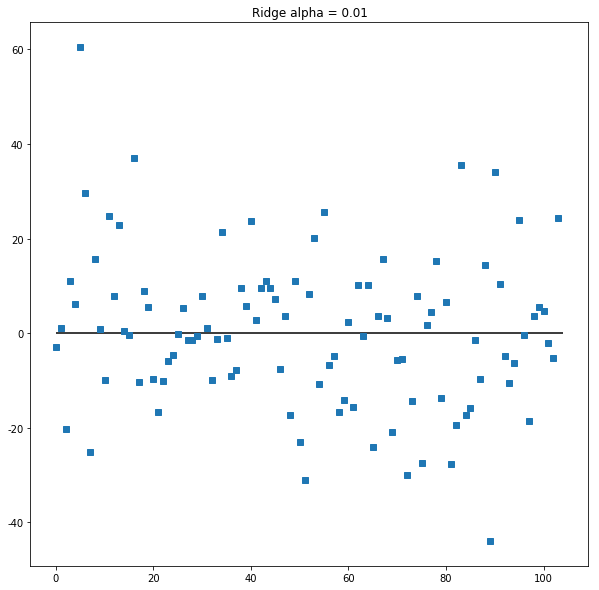

In [55]:
# Alpha = 0.01
fig = plt.figure(figsize=(10,10))
plt.hlines(0,0, len(ridge001.coef_)) # 변수가 104개임...104개 계수
plt.plot(ridge001.coef_, 's', label = 'Ridge Alpha = 0.01')
plt.title('Ridge alpha = 0.01')

Text(0.5, 1.0, 'Ridge Alpha = 0.1')

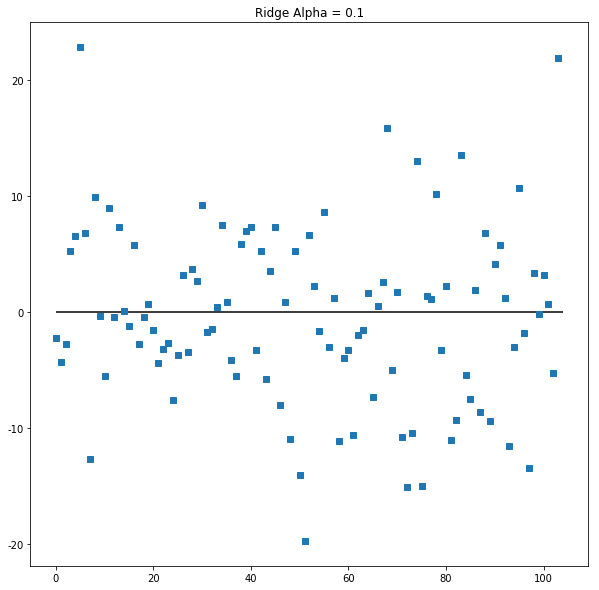

In [56]:
# Alpha = 0.1
fig = plt.figure(figsize = (10,10))
plt.hlines(0,0, len(ridge01.coef_))
plt.plot(ridge01.coef_, 's', label = 'Ridge Alpha = 0.1')
plt.title('Ridge Alpha = 0.1')

Text(0.5, 1.0, 'Ridge Alpha=10')

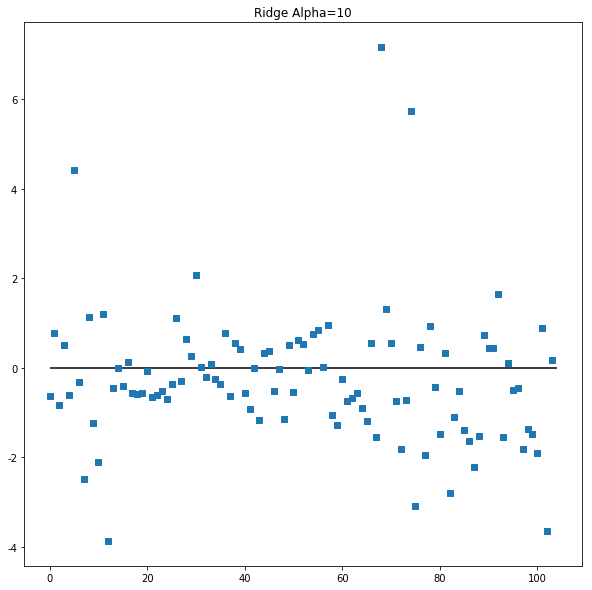

In [57]:
### Alpha = 10
fig = plt.figure(figsize=(10,10))
plt.hlines(0,0, len(ridge10.coef_))
plt.plot(ridge10.coef_, 's', label="Ridge alpha=10")
plt.title('Ridge Alpha=10')

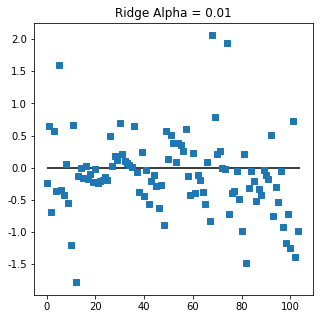

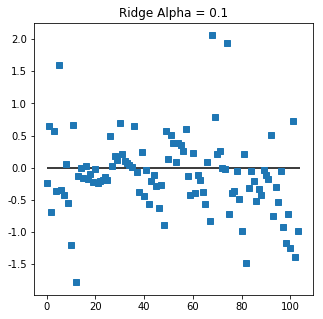

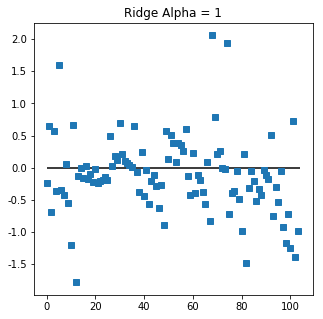

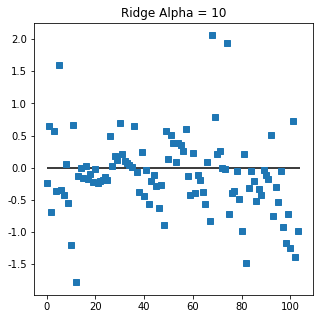

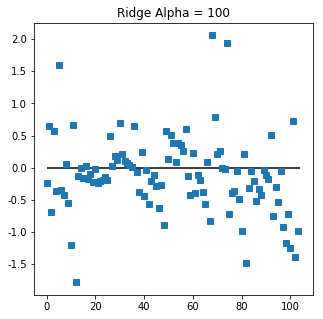

In [62]:
# For 문으로 써볼까요? => 그래프가 똑같이 나옴...? 어떻게 안되나...?

list = [0.01, 0.1, 1, 10, 100]
for i in list:
  fig=plt.figure(figsize = (5,5))
  plt.hlines(0,0, len(ridgei.coef_))
  plt.plot(ridgei.coef_, 's', label = 'Ridge Alpha = [i]')
  plt.title('Ridge Alpha = {}'.format(i))

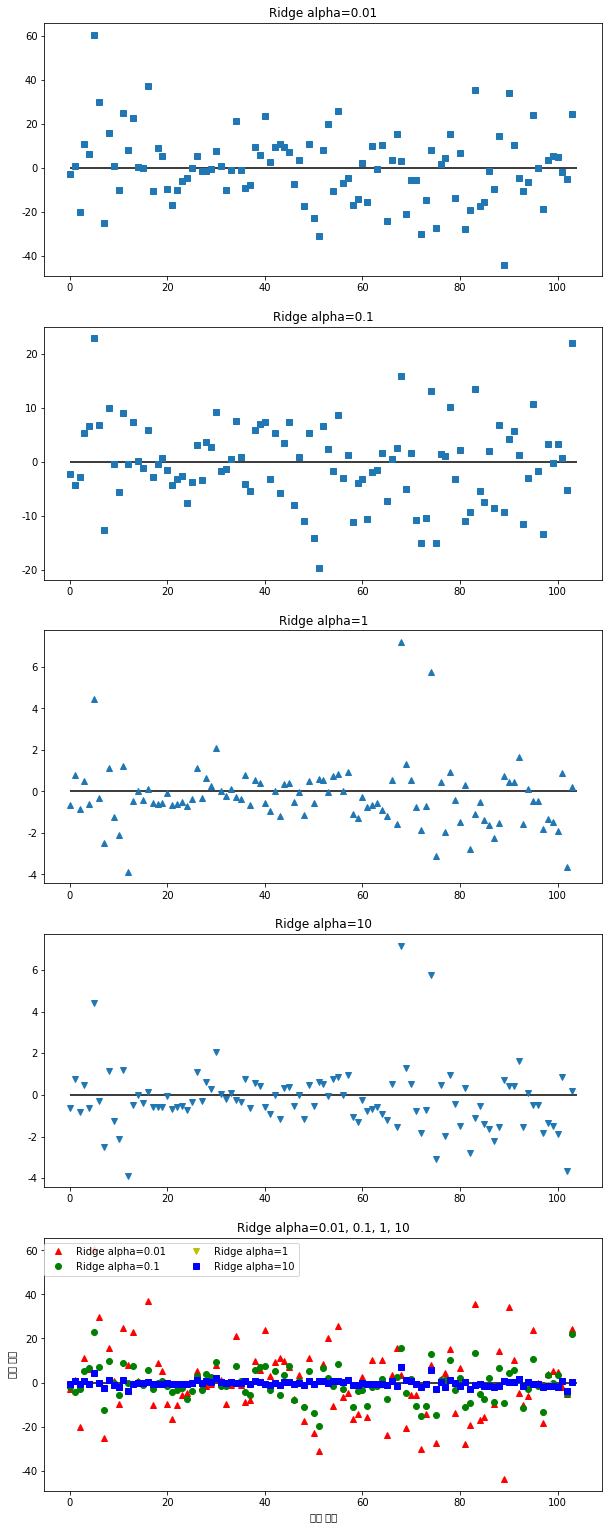

In [63]:
fig = plt.figure(figsize=(10,27))
#ax1 = fig.add_subplot(5, 1, 1)
#ax2 = fig.add_subplot(5, 1, 2)
#ax3 = fig.add_subplot(5, 1, 3)
#ax4 = fig.add_subplot(5, 1, 4)
#ax5 = fig.add_subplot(5, 1, 5)


plt.subplot(5, 1, 1)
plt.hlines(0,0, len(ridge001.coef_))
plt.plot(ridge001.coef_, 's', label="Ridge alpha=0.01")
plt.title('Ridge alpha=0.01')

plt.subplot(5, 1, 2)
plt.hlines(0,0, len(ridge01.coef_))
plt.plot(ridge01.coef_, 's', label="Ridge alpha=0.1")
plt.title('Ridge alpha=0.1')

plt.subplot(5, 1, 3)
plt.hlines(0,0, len(ridge.coef_))
plt.plot(ridge.coef_, '^', label="Ridge alpha=1")
plt.title('Ridge alpha=1')

plt.subplot(5, 1, 4)
plt.hlines(0,0, len(ridge10.coef_))
plt.plot(ridge10.coef_, 'v', label="Ridge alpha=10")
plt.title('Ridge alpha=10')

plt.subplot(5, 1, 5)
plt.hlines(0,0, len(ridge001.coef_))
plt.plot(ridge001.coef_, 'r^', label="Ridge alpha=0.01")
plt.plot(ridge01.coef_, 'go', label="Ridge alpha=0.1")
plt.plot(ridge.coef_, 'yv', label="Ridge alpha=1")
plt.plot(ridge10.coef_, 'bs', label="Ridge alpha=10")
plt.title('Ridge alpha=0.01, 0.1, 1, 10')

plt.xlabel("계수 목록")
plt.ylabel("계수 크기")
plt.legend(ncol=2, loc=(0,0.85))
plt.show()

확인 결과

선형회귀는 과대적합, Ridge는 규제로 인해 과대적합이 적어진다.

alpha을 이용하여 훈련세트의 성능 대비 모델을 얼마나 단순화 시킬 수 있는지 지정 가능.(기본값 alpha=1.0)

alpha의 계수를 높이면 w의 계수를 0에 가깝게 만든다. 계수가 0에 가까워지면 일반화에 도움이 된다.(훈련세트 성능이 나빠짐)

alpha의 게수를 줄이면 그만큼 풀리면서 LinearRegression 으로 모델과 점점 가까워짐

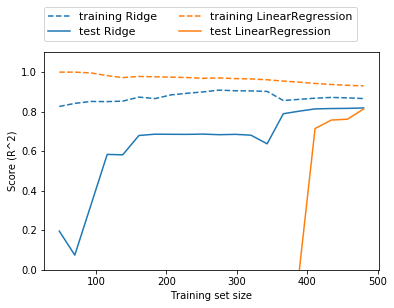

In [64]:
mglearn.plots.plot_ridge_n_samples()

모든 데이터 셋에서 TRAINING의 데이터 셋으로 모델 생성의 경우, 일반선형회귀의 r^2의 값이 높다.

단, 테스트 데이터 셋에서는 모델은 비교시에 릿지 회귀가 Score(r^2)의 값이 높다.

테스트 셋에 대한 경우, 데이터가 많아지면 선형회귀 모델이 릿지 모델에 Score가 거의 가까워진다.

충분한 데이터는 규제항이 덜 중요해져 릿지 회귀와 선형회귀는 같아진다.


라쏘 회귀(Lasso) -릿지(Ridge)의 대안 (L1규제)

릿지 회귀에서와 같이 w(가중치-계수)의 모든 원소가 0에 가깝게 되길 원한다.(규제)

릿지 회귀와 달리 라쏘(Lasso)는 실제로 어떤 계수를 0으로 만든다.- 완전히 제외되는 특성이 발생

라쏘 회귀의 규제 방식은 L1규제라고 하기도 한다.

In [0]:
from sklearn.linear_model import Lasso

In [67]:
lasso = Lasso().fit(X_train, y_train)
print("훈련 셋 점수: {:.2f}".format(lasso.score(X_train, y_train)))
print("테스트 셋 점수: {:.2f}".format(lasso.score(X_test, y_test)))

훈련 셋 점수: 0.23
테스트 셋 점수: 0.20


In [68]:
# 특성(feature)가 0이 아닌 것의 개수는?
print("사용한 특성의 수 : {:.2f}".format(np.sum(lasso.coef_ != 0)))

사용한 특성의 수 : 3.00


### 라쏘의 alpha을 활용하여 살펴보기

In [82]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print('훈련 데이터 셋 점수: ', lasso00001.score(X_train, y_train))
print('테스트 데이터 셋 점수:', lasso00001.score(X_test, y_test))
print('사용한 특성의 수:', np.sum(lasso00001.coef_ != 0))

훈련 데이터 셋 점수:  0.9358779085487696
테스트 데이터 셋 점수: 0.8614405544164084
사용한 특성의 수: 97


In [75]:
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print('훈련 데이터 셋 점수: ', lasso001.score(X_train, y_train))
print('테스트 데이터 셋 점수:', lasso001.score(X_test, y_test))
print('사용한 특성의 수:', np.sum(lasso001.coef_ != 0))

훈련 데이터 셋 점수:  0.8674669117238293
테스트 데이터 셋 점수: 0.8419471661713843
사용한 특성의 수: 31


In [77]:
lasso01 = Lasso(alpha=0.1, max_iter=100000).fit(X_train, y_train)
print('훈련 데이터 셋 점수: ', lasso01.score(X_train, y_train))
print('테스트 데이터 셋 점수: ', lasso01.score(X_test, y_test))
print('사용한 특성의 수: ', np.sum(lasso01.coef_ != 0))

훈련 데이터 셋 점수:  0.7434434277852244
테스트 데이터 셋 점수:  0.7007248129271293
사용한 특성의 수:  7


In [78]:
lasso10 = Lasso(alpha=10, max_iter=100000).fit(X_train, y_train)
print('훈련 데이터 셋 점수: ', lasso10.score(X_train, y_train))
print('테스트 데이터 셋 점수: ', lasso10.score(X_test, y_test))
print('사용한 특성의 수: ', np.sum(lasso10.coef_ != 0))

훈련 데이터 셋 점수:  0.0
테스트 데이터 셋 점수:  -0.004482921853908417
사용한 특성의 수:  0


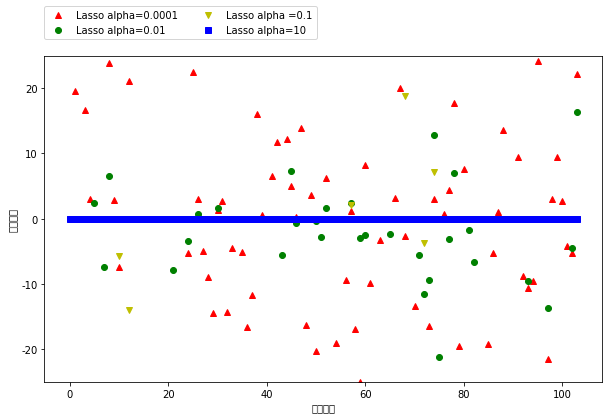

In [83]:
lasso = Lasso(alpha=1).fit(X_train, y_train)

plt.figure(figsize = (10,6))
plt.plot(lasso00001.coef_, "r^", label='Lasso alpha=0.0001')
plt.plot(lasso001.coef_, 'go', label='Lasso alpha=0.01')
plt.plot(lasso01.coef_, 'yv', label='Lasso alpha =0.1')
plt.plot(lasso10.coef_, 'bs', label='Lasso alpha=10')

plt.xlabel("계수목록")
plt.ylabel('계수크기')
plt.ylim(-25, 25)
plt.legend(ncol=2, loc=(0,1.05))
plt.show()

In [0]:
# alpha가 적어지면 적어질수록 규제를 받지 않는 모델이 된다.
# 실제의 경우는 보통 릿지 회귀를 선호함.
# 만약 특성이 많고 일부부만 중요하다면 Lasso가 좋은 선택